<center> <b>UCGIS I-GUIDE Community Champion Project</b> </center>


# Protecting Location Privacy of Individual-level Sensitive Data: A Review of Methods
<i>Yue Lin</i>

This Jupyter notebook demonstrates how techniques such as geomasking and differential privacy can be used to protect the location privacy of individuals when releasing sensitive data.

## Notebook Outline
- [Introduction](#intro)
- [References](#ref)

<a id='intro'></a>
## Introduction
Location privacy is an individual right that prevents a person from being identified based on his or her geographic location. In this notebook, we demonstrate how various techniques can be used to protect privacy when releasing individual-level geographic data.

We use a synthetic individual-level population data set from Guernsey County, Ohio to illustrate the use of these methods. We begin by importing the test data set as shown below.

In [36]:
poly

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,39,059,977700,1101,390599777001101,Block 1101,G5040,R,None,None,S,4339389,3753,+40.0147794,-081.4111556,"POLYGON ((-81.43422 40.03307, -81.43350 40.033..."
1,39,059,977800,1142,390599778001142,Block 1142,G5040,R,None,None,S,0,25023,+39.9309613,-081.4268067,"POLYGON ((-81.42810 39.93154, -81.42804 39.931..."
2,39,059,977100,1014,390599771001014,Block 1014,G5040,R,None,None,S,4622968,15365,+40.1932965,-081.3919558,"POLYGON ((-81.40994 40.19877, -81.40967 40.199..."
3,39,059,977200,1140,390599772001140,Block 1140,G5040,R,None,None,S,0,367911,+40.1508732,-081.5071059,"POLYGON ((-81.51232 40.15228, -81.51219 40.152..."
4,39,059,977200,1179,390599772001179,Block 1179,G5040,R,None,None,S,0,99872,+40.1328765,-081.4840464,"POLYGON ((-81.48778 40.13327, -81.48753 40.133..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,39,059,978000,1113,390599780001113,Block 1113,G5040,R,None,None,S,26192,0,+39.9482711,-081.6242703,"POLYGON ((-81.62665 39.94790, -81.62661 39.947..."
3765,39,059,977800,3009,390599778003009,Block 3009,G5040,R,None,None,S,10248,0,+39.9383000,-081.4629529,"POLYGON ((-81.46340 39.93795, -81.46337 39.938..."
3766,39,059,977100,1047,390599771001047,Block 1047,G5040,R,None,None,S,77048,0,+40.1621441,-081.3949001,"POLYGON ((-81.39853 40.16009, -81.39848 40.160..."
3767,39,059,977200,2156,390599772002156,Block 2156,G5040,R,None,None,S,103424,0,+40.0839328,-081.6050186,"POLYGON ((-81.60976 40.08334, -81.60974 40.083..."


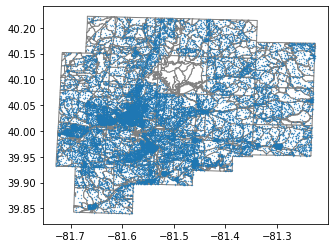

In [38]:
import pandas as pd
import geopandas as gpd

filename_poly = 'data/tl_2020_39059_tabblock10.shp'
poly = gpd.read_file(filename_poly)

filename_df = 'data/guernsey_data.csv'
df = pd.read_csv(filename_df)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat)
)

base = poly.plot(color='white', edgecolor='grey')
gdf.plot(ax=base, markersize=0.1) 

<a id='ref'></a>
## References
<!-- <span id="fn1"> -->